# Proyecto Statistical Learning

In [1]:
!pip install ydata-profiling

In [2]:
import pandas as pd
import numpy as np
import random

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from ydata_profiling import ProfileReport

import tensorflow as tf

from keras.models import Sequential
from keras.layers import Activation, Dropout, Flatten, Dense, Input
from keras import backend as K
from keras import applications, models

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.linear_model import Lasso, Ridge
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer, make_column_selector
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.decomposition import PCA

import optuna

#Librerías extras
import itertools

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.13.0


In [3]:
file = 'C:/Users/danie/OneDrive - Universidad de los andes/Doctorado/Statistical learning/Proyecto/trainReg.txt'
data = pd.read_csv(file)
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91
0,2013,44.81144,0.83826,0,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,1998,41.99180,7.99976,0,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,1998,42.19196,2.23111,0,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,1998,39.28634,-1.85716,0,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,1998,40.36025,2.94918,0,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159


In [4]:
X_train, y_train = data.drop(['V1', 'V4'], axis = 1), data['V1']
X_train

,V2,V3,V5,V6,V7,V8,V9,V10,V11,V12,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91
0,44.81144,0.83826,7.91314,10.94148,-0.04547,-15.16332,-10.47324,14.17212,10.57382,-11.21128,...,-8.44873,-230.30484,-40.94698,48.20025,-0.28694,155.76251,-56.23579,13.62599,123.92018,10.02845
1,41.99180,7.99976,64.26707,16.54115,-9.28737,-40.73524,33.60440,9.18802,-6.79144,44.21327,...,18.68972,-44.06062,52.37792,81.36093,-14.81111,151.66273,-120.61213,10.57519,-3.21078,-1.07438
2,42.19196,2.23111,65.07719,24.99746,1.76100,6.66573,3.45778,-24.42779,-18.45069,233.16766,...,-3.69878,-118.95712,54.15529,-23.32168,-9.65067,-83.83055,-141.17594,7.33084,-275.69714,2.35522
3,39.28634,-1.85716,91.04190,9.08333,0.08502,-5.59216,65.62463,8.33105,11.70269,79.90772,...,20.89044,-18.53135,176.09769,351.33669,3.44682,121.69156,-270.43989,12.51659,-140.88884,-0.23476
4,40.36025,2.94918,53.83723,13.71369,-8.21964,-40.21636,21.22366,17.16742,0.14463,72.23955,...,19.91979,34.59026,-69.83720,102.31946,8.08807,135.08089,-153.02327,4.09207,-68.33046,-6.19159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77774,33.76706,-3.80678,-1.44169,23.78801,5.01781,1.58966,-25.02281,25.90399,19.87408,-21.41492,...,-36.84706,-637.31267,-174.93600,127.32951,-15.75226,-144.64697,6.53731,5.54065,193.68594,32.75930
77775,25.77805,2.41861,5.96418,-8.43658,-1.36182,2.51784,-18.57770,-25.69885,9.97971,-100.96885,...,27.76376,-44.59643,-116.15080,-34.33917,4.86612,141.37999,282.57252,23.32459,125.07389,-19.16268
77776,24.78656,1.36415,34.13329,34.32996,-0.95170,75.33572,-28.59028,-31.86076,-4.06444,-53.17960,...,33.73262,-206.05602,44.10029,-635.01673,-16.75481,114.74225,-192.79351,-4.44202,1457.72692,-50.93615
77777,39.67698,3.65167,34.04925,-0.68467,-2.13911,-5.70096,-10.57862,-1.30048,9.85726,7.33263,...,-15.46611,-117.84462,139.93465,67.70637,-24.18488,-39.54694,185.26251,-1.37534,216.14774,-12.75066


In [5]:
file_val = 'C:/Users/danie/OneDrive - Universidad de los andes/Doctorado/Statistical learning/Proyecto/testReg.txt'
X_test = pd.read_csv(file_val)
X_test = X_test.drop(['Id','V4'],axis=1)
X_test


,V2,V3,V5,V6,V7,V8,V9,V10,V11,V12,...,V82,V83,V84,V85,V86,V87,V88,V89,V90,V91
0,35.74170,0.86615,1.44450,-13.87834,-9.57602,5.89475,-4.46036,-10.60501,-2.20779,-31.56674,...,10.78210,-183.63792,131.18868,37.68626,-4.48926,10.98139,-48.14549,-7.27992,-54.52826,4.81414
1,35.31664,-0.47799,-12.27958,-29.32847,-2.38610,-7.27386,-1.87712,-3.74953,-3.38237,1.54788,...,53.92478,-238.77713,134.28149,81.19403,-4.81669,106.00178,3.34940,2.72328,156.94894,-8.44873
2,43.25032,-6.31920,-2.56469,-7.59368,2.12862,23.29535,-0.34225,4.48761,4.93676,33.62086,...,40.95711,-269.59803,69.88747,29.65701,-0.12854,106.92919,-62.86550,30.12278,24.39843,-10.68316
3,44.94220,-4.12303,-15.79205,7.15794,1.46007,-3.38280,-8.48270,12.69732,-1.68102,3.62442,...,0.81574,-243.09497,24.20334,-10.02719,19.25667,66.15602,-64.78646,9.09148,11.46055,-7.12136
4,50.40813,-1.52061,-10.10142,-17.74876,-5.96768,-29.94136,-11.84237,5.90144,3.95996,6.07786,...,-3.58634,-61.67109,47.53814,139.04916,6.85904,-57.09356,-49.57683,-6.61453,22.55497,-4.39272
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18652,47.13482,3.84421,10.65084,6.76621,-7.62802,3.94229,-17.54994,-1.50402,1.28472,-0.39388,...,6.79574,50.40788,-208.86022,4.07771,22.98125,7.57026,-24.53948,-10.50575,-43.87160,-12.16460
18653,44.88535,1.21785,21.46818,6.06535,-3.21715,-49.46917,-4.24723,-11.95931,-7.80641,37.18960,...,23.74218,31.83756,100.18131,24.23003,-12.11153,-36.12918,-75.12454,-8.55251,-68.83852,16.46255
18654,49.12753,0.02024,-2.47167,11.16809,6.98209,-31.67139,-24.20034,-3.32383,0.42367,39.16904,...,-3.44803,-5.25300,-70.27796,-19.94830,-6.54688,-8.89722,-183.92335,14.82729,192.20814,32.05995
18655,47.07399,-2.12987,19.65870,7.44925,9.22878,-0.28598,5.97625,-5.43954,5.32756,28.76730,...,3.92133,143.43511,-1.45249,-24.09898,-2.44389,45.49691,59.01571,-0.00247,79.83971,7.36172


In [6]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

In [7]:
# Crea un objeto PCA
pca = PCA(n_components=None)  # Puedes especificar el número de componentes deseados si lo conoces

# Aplica PCA a los datos
X_pca = pca.fit_transform(X_scaled)
X_pca

array([[ -0.63061066,   2.74256438,  -0.82643743, ...,  -0.19056771,
         -0.08738883,  -0.14941678],
       [  0.98528106,   3.560313  ,  -2.44626181, ...,  -0.4123608 ,
         -0.49070657,  -0.87109893],
       [ -2.210552  ,  -0.42951059,  -0.35838037, ...,   0.02107202,
          0.03668975,   0.3817478 ],
       ...,
       [  2.28079932, -14.62940395,  -6.57474961, ...,   0.20339834,
          0.61188087,  -0.05255218],
       [  0.1655115 ,  -0.68149957,  -2.18873068, ...,   0.57601517,
          0.42180815,  -0.20903774],
       [  1.7098807 ,   2.33249506,  -4.76884479, ...,   0.25029047,
         -0.2549693 ,   0.2873786 ]])

In [8]:
# Varianza explicada por cada componente principal
explained_variance_ratio = pca.explained_variance_ratio_
print("Varianza explicada por cada componente principal:")
print(explained_variance_ratio)

# Acumulación de varianza explicada
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
print("\nAcumulación de varianza explicada:")
print(cumulative_variance_ratio)

Varianza explicada por cada componente principal:
[0.11930848 0.08020891 0.05809389 0.04111874 0.03749546 0.0285649
 0.02459246 0.02287359 0.02113432 0.0206777  0.01933014 0.01866938
 0.01829342 0.016872   0.01642573 0.01525505 0.01481694 0.01410972
 0.01368881 0.01343025 0.01280297 0.01277203 0.01249149 0.0117793
 0.01153878 0.01136667 0.01122615 0.01110677 0.01085868 0.0099989
 0.00983419 0.00948164 0.00918595 0.00906709 0.00847784 0.00815133
 0.00794115 0.00764739 0.00749225 0.0073217  0.00721033 0.00712931
 0.00688042 0.00674687 0.00650604 0.00628813 0.00609898 0.00598083
 0.00589434 0.00577961 0.00548673 0.00538444 0.00522553 0.00513668
 0.00497527 0.00489001 0.00456945 0.00453343 0.00452699 0.00419654
 0.00413279 0.00391681 0.0038939  0.0037678  0.00368239 0.00344661
 0.00339443 0.00335994 0.00317965 0.00299042 0.00285962 0.00275695
 0.00268036 0.00259133 0.00250557 0.00233811 0.00219992 0.00211931
 0.00200411 0.00194296 0.00180185 0.00171595 0.00154931 0.00134287
 0.00131069 0.0

In [9]:
coef = dict(zip(X_train.columns, cumulative_variance_ratio))
for k,v in coef.items():
    print(f'{k} = {v:,.2f}')


V2 = 0.12
V3 = 0.20
V5 = 0.26
V6 = 0.30
V7 = 0.34
V8 = 0.36
V9 = 0.39
V10 = 0.41
V11 = 0.43
V12 = 0.45
V13 = 0.47
V14 = 0.49
V15 = 0.51
V16 = 0.53
V17 = 0.54
V18 = 0.56
V19 = 0.57
V20 = 0.59
V21 = 0.60
V22 = 0.61
V23 = 0.63
V24 = 0.64
V25 = 0.65
V26 = 0.66
V27 = 0.68
V28 = 0.69
V29 = 0.70
V30 = 0.71
V31 = 0.72
V32 = 0.73
V33 = 0.74
V34 = 0.75
V35 = 0.76
V36 = 0.77
V37 = 0.78
V38 = 0.79
V39 = 0.79
V40 = 0.80
V41 = 0.81
V42 = 0.82
V43 = 0.82
V44 = 0.83
V45 = 0.84
V46 = 0.84
V47 = 0.85
V48 = 0.86
V49 = 0.86
V50 = 0.87
V51 = 0.87
V52 = 0.88
V53 = 0.89
V54 = 0.89
V55 = 0.90
V56 = 0.90
V57 = 0.91
V58 = 0.91
V59 = 0.92
V60 = 0.92
V61 = 0.92
V62 = 0.93
V63 = 0.93
V64 = 0.94
V65 = 0.94
V66 = 0.94
V67 = 0.95
V68 = 0.95
V69 = 0.96
V70 = 0.96
V71 = 0.96
V72 = 0.96
V73 = 0.97
V74 = 0.97
V75 = 0.97
V76 = 0.98
V77 = 0.98
V78 = 0.98
V79 = 0.98
V80 = 0.98
V81 = 0.99
V82 = 0.99
V83 = 0.99
V84 = 0.99
V85 = 0.99
V86 = 1.00
V87 = 1.00
V88 = 1.00
V89 = 1.00
V90 = 1.00
V91 = 1.00


In [10]:
umbral = 0.95

for car, var in coef.items():
    if var >= umbral:
        print(f'La característica "{car}" supera el 95% de acumulación de varianza explicada.')
        break  # Rompe el bucle cuando se encuentra la primera característica que cumple el umbral

La característica "V68" supera el 95% de acumulación de varianza explicada.


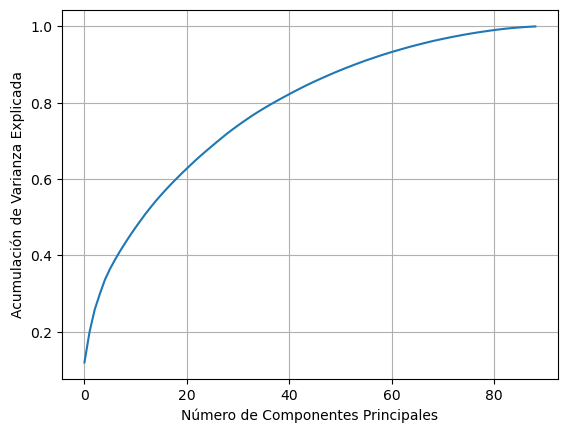

In [11]:
# Crea un objeto PCA
pca = PCA()

# Ajusta PCA a los datos escalados
pca.fit(X_scaled)

# Calcula la acumulación de la varianza explicada
cumulative_variance_ratio = np.cumsum(pca.explained_variance_ratio_)

# Trazar la acumulación de la varianza explicada
plt.plot(cumulative_variance_ratio)
plt.xlabel('Número de Componentes Principales')
plt.ylabel('Acumulación de Varianza Explicada')
plt.grid()
plt.show()

In [12]:
# Define el número deseado de componentes principales
n_components_desired = 65  # Ajusta este valor según tus necesidades

# Crea un nuevo objeto PCA con el número deseado de componentes
pca = PCA(n_components=n_components_desired)

# Aplica PCA nuevamente con el número deseado de componentes
X_pca = pca.fit_transform(X_scaled)
X_pca


array([[ -0.63061068,   2.74256424,  -0.82643756, ...,  -0.0497404 ,
         -0.1822427 ,   0.47960005],
       [  0.98528096,   3.56031257,  -2.4462633 , ...,   0.70999568,
         -0.82622009,  -0.13219929],
       [ -2.21055207,  -0.42951054,  -0.35838169, ...,   0.05200692,
         -0.52842205,  -0.42172087],
       ...,
       [  2.28079916, -14.62940461,  -6.57475212, ...,  -2.51976066,
          1.23944727,  -1.04143153],
       [  0.16551141,  -0.68149988,  -2.1887309 , ...,  -1.99952153,
          2.61551637,   0.92738036],
       [  1.70988079,   2.33249504,  -4.76884374, ...,  -1.14652925,
          0.7043047 ,   0.21140549]])

In [13]:
Rand_for = RandomForestRegressor(n_estimators=154, max_depth=5 ,random_state=23, n_jobs=-1)

Rand_for.fit(X_pca, y_train)

RandomForestRegressor(max_depth=5, n_estimators=154, n_jobs=-1, random_state=23)

In [14]:
y_pred_rf = Rand_for.predict(X_pca)
mse = mean_squared_error(y_train, y_pred_rf)
print(f'Mean Squared Error en el conjunto de prueba: {mse:.2f}')

Mean Squared Error en el conjunto de prueba: 101.62


In [16]:
import optuna
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


y = data['V1']

# Define la función objetivo para Optuna
def objective(trial):
    alpha = trial.suggest_float('alpha', 0.1, 1e2)  # Hiperparámetro alpha (regularización)
    # Crear el modelo de regresión polinomial con Lasso
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=2)),  # Grado del polinomio
        ('lasso', Lasso(alpha=alpha))  # Modelo Lasso
    ])

    # Entrenar y evaluar el modelo utilizando validación cruzada
    mse_scores = []
    for _ in range(5):  # K-fold cross-validation (5-fold en este ejemplo)
        X_train, X_valid, y_train, y_valid = train_test_split(X_pca, y, test_size=0.2, random_state=42)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_valid)
        mse = mean_squared_error(y_valid, y_pred)
        mse_scores.append(mse)

    # Devolver el error cuadrático medio promedio
    return np.mean(mse_scores)

# Configura y ejecuta el estudio de Optuna
study = optuna.create_study(direction='minimize')  # Minimizar el MSE
study.optimize(objective, n_trials=100)  # Realiza 100 iteraciones (puedes ajustar este número)

# Obtiene los mejores hiperparámetros y el mejor modelo
best_params = study.best_params
best_alpha = best_params['alpha']
best_model = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('lasso', Lasso(alpha=best_alpha))
])


[I 2023-12-06 19:28:57,598] A new study created in memory with name: no-name-2cd49387-3641-421f-bba0-50b1b587b272
[I 2023-12-06 19:29:15,792] Trial 0 finished with value: 115.37869015304406 and parameters: {'alpha': 21.274604626067003}. Best is trial 0 with value: 115.37869015304406.
[I 2023-12-06 19:29:39,344] Trial 1 finished with value: 115.37869015304406 and parameters: {'alpha': 84.84742823756936}. Best is trial 0 with value: 115.37869015304406.
[I 2023-12-06 19:30:01,405] Trial 2 finished with value: 115.37869015304406 and parameters: {'alpha': 39.85574126003662}. Best is trial 0 with value: 115.37869015304406.
[I 2023-12-06 19:30:18,902] Trial 3 finished with value: 115.37869015304406 and parameters: {'alpha': 38.54583033857411}. Best is trial 0 with value: 115.37869015304406.
[I 2023-12-06 19:30:35,233] Trial 4 finished with value: 115.37869015304406 and parameters: {'alpha': 32.515777644345185}. Best is trial 0 with value: 115.37869015304406.
[I 2023-12-06 19:30:51,605] Trial 

KeyboardInterrupt: 